# The COVID Cubic
## 19 May, 2020

Last night, like a lot of people, I learned about the so-called ["cubic model"](https://twitter.com/WhiteHouseCEA/status/1257680258364555264) Trump's White House has been using to model the COVID outbreak.  This is just plain bad math.  I will leave the "popular" response to others.  In this post I am talking to people who are comfortable with a modest amount of mathematics, perhaps Pre-Calculus, and I want them to know why they would get a big red "F" on this paper if they turned it into me.

## Modeling Basics

### Single Variable Models
They key to building a mathematical or statistical model is to include **variables** that represent the driving phenomenon.  For instance, most econometric and epidemiological models include a variable for time because things are expected to change over time.  Think **flu cases**.  It changes over time.  If we call tulip population $N$ (for "number of cases"), then our model would be at least a function $f$ of time $t$ and we would write

$$
N = f(t)
$$

This model assumes that cold cases vary **only in time**.  Put a pin in that thought if you will.

### Multi-Variable Models
Suppose we wanted to make this a global model people could use anywhere on earth.  Then **season** would be included in $t$ but we'd still need to know if the user is in the northern or southern hemisphere.  If we add a variable $l$ for **location**, then $N$ would be a function of both $t$ and $l$ and we'd write

$$
N = f(t,l)
$$

Now we have a model for $N$ that varies by both time, maybe just season, and by location.  The question is: How does it vary by time?  When we ask "how does something vary by something else?" we are asking a question about the **dynamics** of the system.  When we talk about a function changing in time, the dynamics, we are talking about the **derivative** of the function $N$ and we use the notation

$$
\frac{d}{dt}N \;\;\; \mbox{or} \;\;\; \frac{\partial}{\partial t}N
$$

There are a few other ways to write this.  We use $dN$ when the function only include time $t$ and $\partial N$ if there are other variables included like $l$.  The $\partial$ is a Greek delta but mathematicians usually just say "partial N".

So, dear reader, ask youself: 

* Does the number of flu cases tomorrow depend on the number of flu cases today?  
* Will I get a different number tomorrow cases tomorrow if I live in New York or Montana?  
* When building my model, do I need to consider how many people might already be infected?

Of course it will.  It is at the very core of the $f(n)$ problem.  (Pronouce $f(n)$ as "eff-n" and you'll see I'm politely swearing. When shouting, I use $F(N)$)  Anyone with a reasonable understanding of mathematical modeling will see that $N(today)$ changes by $N(yesterday)$.  Since $dN$ is the change, we get a [**differential equation**](https://en.wikipedia.org/wiki/Differential_equation) of the form

$$
\frac{d}{dt}N = cN
$$

where $c$ is a number we use for scaling.  If you followed the Wikipedia link, they sometimes use $N^\prime$ or $y^\prime$ for $dN$.

Unpin the Single Variable Models. Now you have that right there, the CEA has already failed the class.  But it gets worse.  Hold this pin.

## Polynomial Modeling

In the parlance of mathematics, **cubic** means a function where the highest power of $t$ is 3.  E.g. $f(t) = t^3 - 1$.  Here are some graphs for things that a presumed to decrease over time, so I put in a negative.  I have 

* Linear: $f(t) = -t - 5$
* Quadratic: $f(t) = -(t-5)^2$
* Cubic: $f(t) = -(t-5)^3$
* Quartic: $f(t) = -(t-5)^4$

for you to enjoy.  Ignore the 5 and think about the shapes.

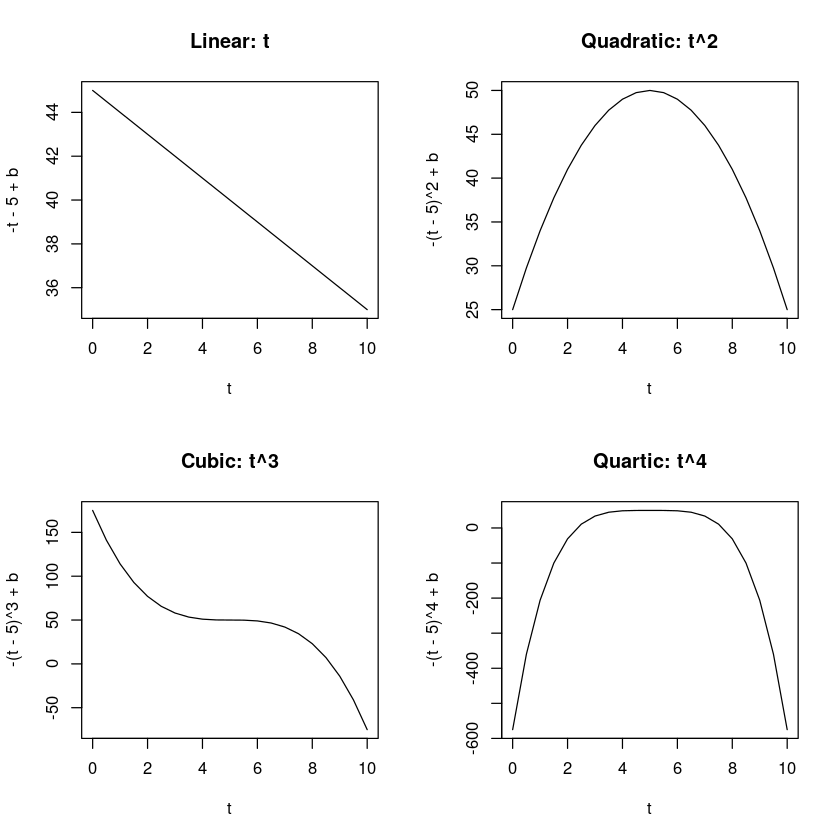

In [10]:
t <- seq(0, 10, by = 0.5)
b = 50
par(mfrow=c(2,2))
plot(t, -t-5 + b, type="l", main = "Linear: t")
plot(t, -(t-5)^2 + b, type="l", main = "Quadratic: t^2")
plot(t, -(t-5)^3 + b, type="l", main = "Cubic: t^3")
plot(t, -(t-5)^4 + b, type="l", main = "Quartic: t^4")

See that third one there?  It's a **cubic polynomial model**.  And it sucks a million ways for epidemics.

* It starts up and to the left.  Like one day we had 150 cases out of nowhere.
* It assumes exactly one change in dynamics where it flattens out.  Take a look at the [actuals](https://www.cnn.com/interactive/2020/health/coronavirus-us-maps-and-cases/) and tell me what you think about that.
* It doesn't consider the current number of cases, ONLY TIME.  As if a virus only keeps a watch and has no idea how many people are infected.
* It's an easy Excel plugin, so "modelers" can appeal to authority and say it must be right because Microsoft gave it to them.  Ignorance is no excuse.

## Cubic Model Variants

So the reader could follow it, our cubic model is boring.  But here is an idea of how else a negative cubic can look.

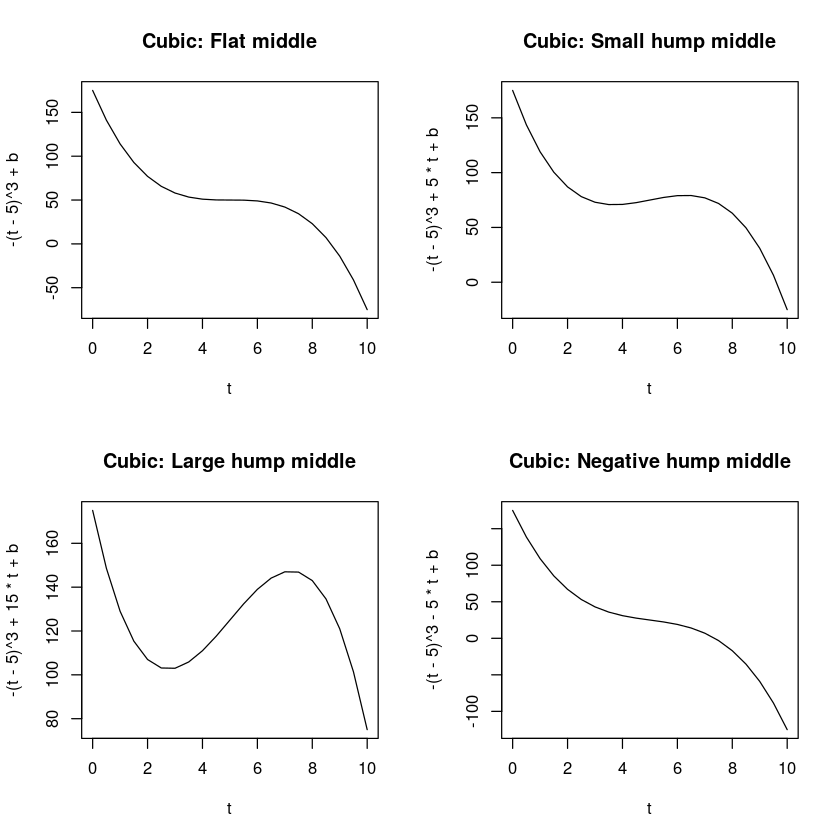

In [18]:
t <- seq(0, 10, by = 0.5)
b = 50
par(mfrow=c(2,2))
plot(t, -(t-5)^3 + b, type="l", main="Cubic: Flat middle")
plot(t, -(t-5)^3 + 5*t + b, type="l", main="Cubic: Small hump middle")
plot(t, -(t-5)^3 + 15*t + b, type="l", main="Cubic: Large hump middle")
plot(t, -(t-5)^3 - 5*t + b, type="l", main="Cubic: Negative hump middle")

If you want to know more about how to properly use cubic models, honestly, just ask me.  I love to talk about math. But I will say that polynomial models in general are okay  JUST NOT HERE.

## People Are Dying, Do it $F(N)$ RIGHT

The proper, empirically valid way of modeling epidemics is using differential equations.  Typically people use [SIR Models](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology).  If you aren't familiar with these methods, you should not be doing epidemiological models for public policy.  Period.  End. Full stop.

## How It's Supposed to Look

The number of infected people is usually denoted as $I(t)$ in S-I-R models.  I want to show you how a proper model should looks, but it's too much to go over a [full course on differential equations](https://www.khanacademy.org/math/differential-equations) here.  But damn, they are fun.

Here are some key properties to the generally expected progress of $I(t)$ to people who study it professionally.

* $I(0)$ means the number of people infected at the outset.  E.g. when $t=0$.  This has to be at least 1 otherwise there is no transmission.
* The intial growth looks like a quadratic function.  That is there is a small curve up from $t=0$.  It does not start high, it doesn't shoot straight up.
* After the peak, the decay is MUCH SLOWER than the growth.
* It has at least two inflection points (where it kinda bends from going up fast to going up slowly)
* It was constructed by someone who understands epidemiology. 
* When $t \to \infty$ (time goes on), $I(t)$ goes to 0.

When you read this, understand that the cubic model is a complete piece of crap in this context.  It comes down from infinity, change once, then goes to negative infinity, as if you can have "negative infinity" infections.

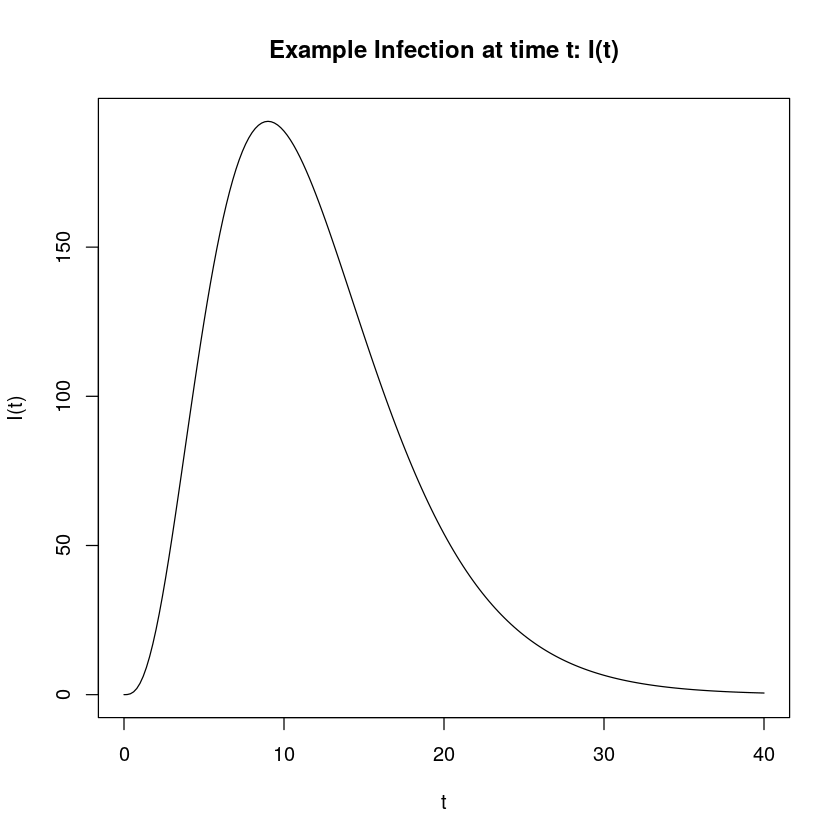

In [62]:
t <- seq(0, 40, by = 0.2)
s0 <- 1
r0 <- 10
rho <- 10
N <- function(t, s0, r0, rho){
    t^3 * exp(-(t-5)/3)
}
plot(t, N(t, s0, r0, rho), type="l", main="Example Infection at time t: I(t)", ylab="I(t)")

# Wrap Up

Listen to experts. If you haven't wasted your life studying mathematics, ask someone who has.  There are a lot of us and we like to talk about it.  Don't believe everything you hear, even if it comes from a fancy title.

# Who Am I?
I'm [Brian Dolan](https://www.linkedin.com/in/buddha314/), a mathematician and cyberneticist that cares about math, artificial intelligence and good analytics practices.  I have my biases and preferences, of course.  One of those is to rely on careful analysis rather than gut reactions or political diatribes.  Get in touch with me at [Verdant AI](https://www.verdant.ai/) if you want to talk about solving complicated problems with sophisticated methods.  Or if you just love the Irish banjo or ice hockey.

Be healthy, take care of each other and try to be nice.